Визуализации данных можно посветить отдельный курс, так как тема очень обширная, поэтому в рамках урока мы рассмотрим только два основных метода, с помощью которых можно начать смотреть на данные. Начнём с гистограммы, которая показывает распределение данных и выбросы.

In [21]:
from idlelib.iomenu import encoding

import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv('data/train.csv', encoding='ISO-8859-1', low_memory=False)

vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sim, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


<Axes: >

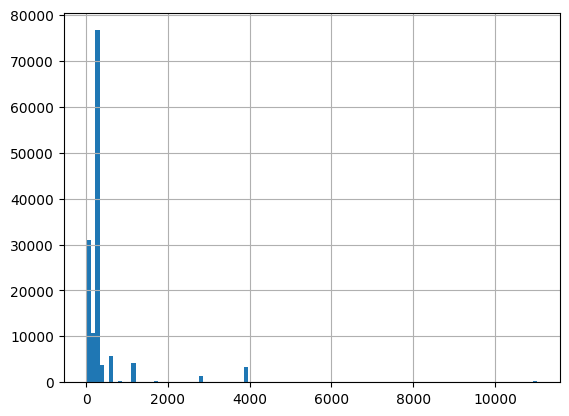

In [11]:
vis_data.balance_due[vis_data.balance_due > 0].hist(bins=100)


Многие алгоритмы работают лучше, когда на вход принимают нормально распределённые данные.

Один из способов сделать данные «нормальными» — взять логарифм. При этом не должно быть значений равных 0, иначе метод np.log выдаст бесконечность.

Если значения всё-таки начинаются с 0, то перед тем, как взять логарифм, можно прибавить к данным 1.

<Axes: >

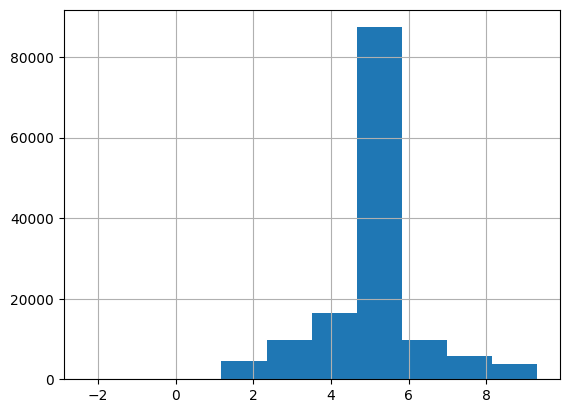

In [13]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist()

<Axes: >

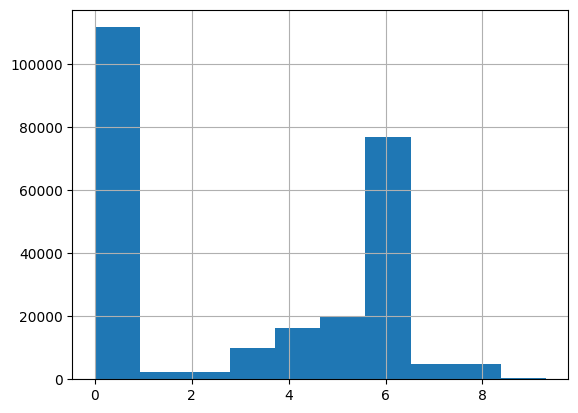

In [18]:
np.log(vis_data.balance_due[vis_data.balance_due >= 0] + 1).hist()

Другой способ — взять квадратный корень от данных:

<Axes: >

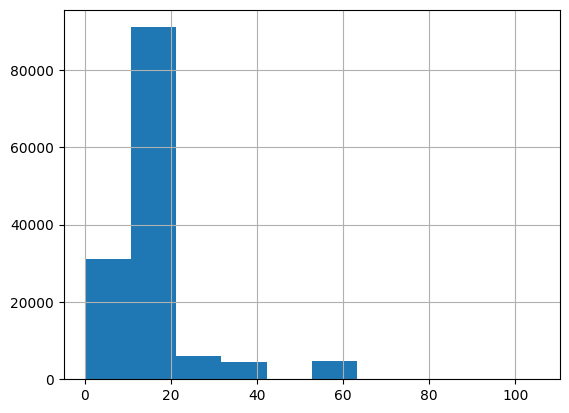

In [16]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

Между некоторыми признаками есть некоторая линейная зависимость, то есть они сильно скоррелированы друг с другом.

Если зависимость большая, то следует убрать часть скоррелированных признаков, так как они несут избыточную информацию.

Для определения зависимости можно посчитать матрицу корреляции для признаков и построить, например, heatmap, чтобы проще было увидеть зависимость.

In [26]:
import seaborn as sns

corr = vis_data.drop(['violation_zip_code', 'payment_amount',
                      'clean_up_cost',
                      'violation_street_number',
                      'agency_name',
                            'inspector_name',
                            'violator_name',
                            'violation_street_name',
                            'mailing_address_str_name',
                            'city',
                            'state',
                            'zip_code',
                            'non_us_str_code',
                            'country',
                            'ticket_issued_date',
                            'hearing_date',
                            'violation_code',
                            'violation_description',
                            'disposition',
                            'payment_date',
                            'payment_status',
                            'collection_status',
                            'grafitti_status',
                            'compliance_detail',
                      ], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify").set_table_styles(magnify())
    #.set_precision(2)\
    #.set_table_styles(magnify())


,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1.000000,-0.038099,-0.038099,-0.005715,-0.019900,-0.012859,0.003718
admin_fee,-0.038099,1.000000,1.000000,0.286289,0.027442,0.322319,0.275884
state_fee,-0.038099,1.000000,1.000000,0.286289,0.027442,0.322319,0.275884
late_fee,-0.005715,0.286289,0.286289,1.000000,-0.013891,0.989371,0.948404
discount_amount,-0.019900,0.027442,0.027442,-0.013891,1.000000,0.040895,-0.018124
judgment_amount,-0.012859,0.322319,0.322319,0.989371,0.040895,1.000000,0.941940
balance_due,0.003718,0.275884,0.275884,0.948404,-0.018124,0.941940,1.000000
